In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import pickle
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
# Load the CSV files into df
ArabertB_data = pd.read_csv("cosine_Arabertb.csv")
CA_data = pd.read_csv("cosine_CA.csv")
MSA_data = pd.read_csv("cosine_MSA.csv")

In [3]:
# adding a cosine distance column to the dataframes

# Function to convert similarity score to cosine distance
def convert_to_cosine_distance(similarity_score):
    return 1 - similarity_score

# Process ArabertB_data
ArabertB_data['Cosine Distance'] = ArabertB_data['Cosine Similarity Score'].apply(convert_to_cosine_distance)

# Process CA_data
CA_data['Cosine Distance'] = CA_data['Cosine Similarity Score'].apply(convert_to_cosine_distance)

# Process MSA_data
MSA_data['Cosine Distance'] = MSA_data['Cosine Similarity Score'].apply(convert_to_cosine_distance)

In [4]:
# adding z-score column to the dataframes

# Calculate z-scores for ArabertB_data
ArabertB_data['Z-Score'] = zscore(ArabertB_data['Cosine Distance'])

# Calculate z-scores for CA_data
CA_data['Z-Score'] = zscore(CA_data['Cosine Distance'])

# Calculate z-scores for MSA_data
MSA_data['Z-Score'] = zscore(MSA_data['Cosine Distance'])

In [5]:
# checking the df
ArabertB_data

,Target Word,Cosine Similarity Score,Cosine Distance,Z-Score
0,خالد,0.473958,0.526042,0.206776
1,رفع,0.429688,0.570312,0.673743
2,يعلم,0.450521,0.549479,0.453994
3,قلب,0.507812,0.492188,-0.150317
4,كفر,0.625000,0.375000,-1.386408
...,...,...,...,...
302,موقع,0.406250,0.593750,0.920962
303,حائط,0.455729,0.544271,0.399056
304,سيار,0.348958,0.651042,1.525273
305,طيار,0.549479,0.450521,-0.589816


In [6]:
# Create a dictionary to store the dataframes of the cosine similarity/distance scores + z-scores

model_data = {
    'ArabertB': {
        'target_words': ArabertB_data['Target Word'].tolist(),
        'cosine_similarity': ArabertB_data['Cosine Similarity Score'].tolist(),
        'cosine_distance': ArabertB_data['Cosine Distance'].tolist(),
        'Z-Score': ArabertB_data['Z-Score'].tolist()
    },
    'CA': {
        'target_words': CA_data['Target Word'].tolist(),
        'cosine_similarity': CA_data['Cosine Similarity Score'].tolist(),
        'cosine_distance': CA_data['Cosine Distance'].tolist(),
        'Z-Score': CA_data['Z-Score'].tolist()
    },
    'MSA': {
        'target_words': MSA_data['Target Word'].tolist(),
        'cosine_similarity': MSA_data['Cosine Similarity Score'].tolist(),
        'cosine_distance': MSA_data['Cosine Distance'].tolist(),
        'Z-Score': MSA_data['Z-Score'].tolist()
    }
}

# Save the dictionary to a pickle file
with open('Results.pkl', 'wb') as f:
    pickle.dump(model_data, f)

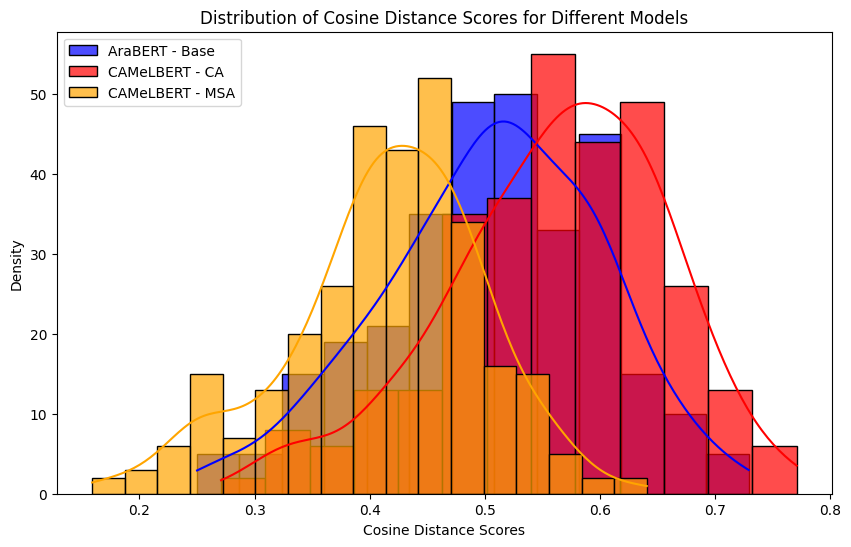

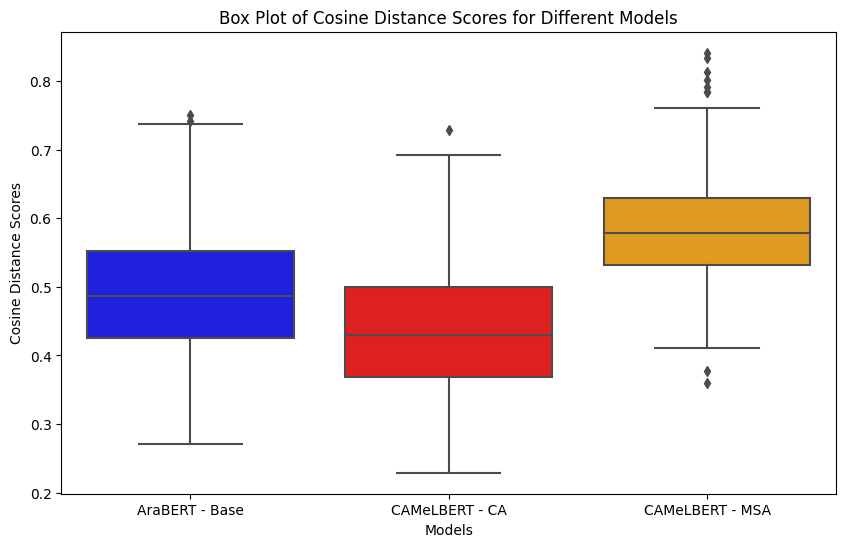

In [7]:
# Plot distribution plots for cosine distance of each model
plt.figure(figsize=(10, 6))
sns.histplot(ArabertB_data['Cosine Distance'], kde=True, label='AraBERT - Base', color='blue', alpha=0.7)
sns.histplot(CA_data['Cosine Distance'], kde=True, label='CAMeLBERT - CA', color='red', alpha=0.7)
sns.histplot(MSA_data['Cosine Distance'], kde=True, label='CAMeLBERT - MSA', color='orange', alpha=0.7)

plt.xlabel("Cosine Distance Scores")
plt.ylabel("Density")
plt.title("Distribution of Cosine Distance Scores for Different Models")
plt.legend()
plt.show()

# Plot box plots for cosine scores of each model
plt.figure(figsize=(10, 6))
color_palette = ['blue', 'red', 'orange']
sns.boxplot(data=[ArabertB_data['Cosine Similarity Score'],
                  CA_data['Cosine Similarity Score'], MSA_data['Cosine Similarity Score']], palette=color_palette)
plt.xlabel("Models")
plt.ylabel("Cosine Distance Scores")
plt.title("Box Plot of Cosine Distance Scores for Different Models")
plt.xticks(ticks=[0, 1, 2], labels=['AraBERT - Base', 'CAMeLBERT - CA', 'CAMeLBERT - MSA'])
plt.show()

In [8]:
# just seeing differences in how models treat the words and if there are any well defined separations between 'changed' and 'stable' words
# data
model_dfs = [ArabertB_data, CA_data, MSA_data]

# Define the number of clusters (changed and stable)
n_clusters = 2

# Create lists to hold cluster assignments for each model
cluster_assignments_by_model = []

# Iterate over each model
for df in model_dfs:
    # Extract cosine distance scores for the model
    scores = np.array(df['Cosine Distance']).reshape(-1, 1)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_assignments = kmeans.fit_predict(scores)

    # Append cluster assignments to the list
    cluster_assignments_by_model.append(cluster_assignments)

# Iterate over each model's cluster assignments and classify words
for i, df in enumerate(model_dfs):
    words = df['Target Word']
    cluster_assignments = cluster_assignments_by_model[i]

    # Classify each word based on cluster assignment
    classified_words = {'Stable': [], 'Changed': []}
    for word, cluster in zip(words, cluster_assignments):
        if cluster == 0:
            classified_words['Stable'].append(word)
        else:
            classified_words['Changed'].append(word)

    # Print the classified words for the model
    print(f"Model {i + 1} - Stable Words:", classified_words['Stable'])
    print(f"Model {i + 1} - Changed Words:", classified_words['Changed'])
    print()

Model 1 - Stable Words: ['خالد', 'رفع', 'يعلم', 'قلب', 'نصر', 'إنسان', 'عزيز', 'أيام', 'دليل', 'أخرى', 'إيمان', 'شعر', 'نسخ', 'بغداد', 'مسجد', 'يجب', 'حرم', 'سفيان', 'علماء', 'حجر', 'كسر', 'إسناد', 'جواب', 'جامع', 'انظر', 'فقيه', 'قضاء', 'صور', 'طالب', 'نسائي', 'وجود', 'كلم', 'شهر', 'حاتم', 'عرب', 'طبق', 'سلطان', 'مطلق', 'يدل', 'شمس', 'مكان', 'فرق', 'حاج', 'فصل', 'عظيم', 'جزء', 'ترمذي', 'حاكم', 'سبيل', 'منع', 'يعرف', 'عذاب', 'خطاب', 'حبان', 'قسم', 'زمان', 'معرف', 'مقام', 'ثابت', 'نصف', 'دمشق', 'ضعيف', 'حارث', 'أحاديث', 'بحر', 'مصدر', 'ولي', 'معجم', 'معاوي', 'شهاد', 'هشام', 'يصح', 'ورق', 'بلاد', 'واجب', 'لقد', 'أكل', 'حدثني', 'عهد', 'معنا', 'حمد', 'علام', 'جواز', 'كفار', 'وصف', 'حرب', 'يمكن', 'قيم', 'مشهور', 'أعمال', 'منمن', 'اختلف', 'سماء', 'والد', 'كذب', 'مسند', 'دفع', 'كثر', 'بلد', 'أبى', 'جابر', 'تقدير', 'حميد', 'كامل', 'كافر', 'يخرج', 'شعب', 'محرم', 'سابق', 'شام', 'حنيف', 'سواء', 'بغدادي', 'ثبت', 'قليل', 'كمال', 'وفا', 'أنفس', 'عقل', 'صغير', 'عدي', 'أنزل', 'اختلاف', 'ظلم', 'يدخل', 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# exploring how connected/related the models are to each other

# Calculate the Spearman correlation between ArabertB_data and CA_data
arabertb_ca_corr = ArabertB_data['Z-Score'].corr(CA_data['Z-Score'], method='spearman')

# Calculate the Spearman correlation between ArabertB_data and MSA_data
arabertb_msa_corr = ArabertB_data['Z-Score'].corr(MSA_data['Z-Score'], method='spearman')

# Calculate the Spearman correlation between CA_data and MSA_data
ca_msa_corr = CA_data['Z-Score'].corr(MSA_data['Z-Score'], method='spearman')

print("Spearman Correlation between ArabertB_data and CA_data:", arabertb_ca_corr)
print("Spearman Correlation between ArabertB_data and MSA_data:", arabertb_msa_corr)
print("Spearman Correlation between CA_data and MSA_data:", ca_msa_corr)


Spearman Correlation between ArabertB_data and CA_data: 0.5868315677620076
Spearman Correlation between ArabertB_data and MSA_data: 0.6998295162565282
Spearman Correlation between CA_data and MSA_data: 0.7674923224255135


In [10]:
# exploring overlap between chunks of words between all three models' z-score
def split_list(input_list, split_size):
    splitted_list = []
    for i in range(0, len(input_list), split_size):
        splitted_list.append(input_list[i:i + split_size])

    if len(input_list) % split_size > 0:
        splitted_list[-2].extend(splitted_list[-1])
        splitted_list.pop()

    return splitted_list

split_size = 30
splitted = dict()

data_frames = {'ArabertB': ArabertB_data, 'CA': CA_data, 'MSA': MSA_data}

for model_name, df in data_frames.items():
    sorted_list = list(dict(sorted(df['Z-Score'].items(), key=lambda item: item[1])))
    splitted[model_name] = split_list(sorted_list, split_size)

print('Overlap ratio between chunks from stable to changed\n')

for i in range(len(sorted_list) // split_size):
    x = [set(splitted[model_name][i]) for model_name in data_frames.keys()]
    overlap_ratios = (np.asarray([len(x[0].intersection(x[1])), len(x[0].intersection(x[2])), len(x[1].intersection(x[2]))]) / len(x[0])).round(2)
    print(overlap_ratios)


Overlap ratio between chunks from stable to changed

[0.53 0.67 0.7 ]
[0.27 0.37 0.3 ]
[0.1  0.27 0.17]
[0.17 0.17 0.2 ]
[0.27 0.17 0.2 ]
[0.03 0.17 0.2 ]
[0.2  0.1  0.17]
[0.07 0.13 0.23]
[0.17 0.17 0.13]
[0.32 0.41 0.43]


In [11]:
# exploring overlap between chunks of words between all three models' cosine similarity score
def split_list(input_list, split_size):
    splitted_list = []
    for i in range(0, len(input_list), split_size):
        splitted_list.append(input_list[i:i + split_size])

    if len(input_list) % split_size > 0:
        splitted_list[-2].extend(splitted_list[-1])
        splitted_list.pop()

    return splitted_list

split_size = 30
splitted = dict()

data_frames = {'ArabertB': ArabertB_data, 'CA': CA_data, 'MSA': MSA_data}

for model_name, df in data_frames.items():
    sorted_list = list(dict(sorted(df['Cosine Similarity Score'].items(), key=lambda item: item[1])))
    splitted[model_name] = split_list(sorted_list, split_size)

print('Overlap ratio between chunks from changed to stable\n')

for i in range(len(sorted_list) // split_size):
    x = [set(splitted[model_name][i]) for model_name in data_frames.keys()]
    overlap_ratios = (np.asarray([len(x[0].intersection(x[1])), len(x[0].intersection(x[2])), len(x[1].intersection(x[2]))]) / len(x[0])).round(2)
    print(overlap_ratios)

Overlap ratio between chunks from changed to stable

[0.37 0.37 0.4 ]
[0.13 0.17 0.07]
[0.17 0.1  0.23]
[0.2  0.13 0.2 ]
[0.13 0.2  0.17]
[0.27 0.13 0.17]
[0.1  0.13 0.2 ]
[0.2  0.17 0.27]
[0.13 0.27 0.3 ]
[0.59 0.76 0.81]


In [12]:
# exploring overlap between chunks of words between all three models' cosine distance score
def split_list(input_list, split_size):
    splitted_list = []
    for i in range(0, len(input_list), split_size):
        splitted_list.append(input_list[i:i + split_size])

    if len(input_list) % split_size > 0:
        splitted_list[-2].extend(splitted_list[-1])
        splitted_list.pop()

    return splitted_list

split_size = 30
splitted = dict()

data_frames = {'ArabertB': ArabertB_data, 'CA': CA_data, 'MSA': MSA_data}

for model_name, df in data_frames.items():
    sorted_list = list(dict(sorted(df['Cosine Distance'].items(), key=lambda item: item[1])))
    splitted[model_name] = split_list(sorted_list, split_size)

print('Overlap ratio between chunks from stable to changed\n')

for i in range(len(sorted_list) // split_size):
    x = [set(splitted[model_name][i]) for model_name in data_frames.keys()]
    overlap_ratios = (np.asarray([len(x[0].intersection(x[1])), len(x[0].intersection(x[2])), len(x[1].intersection(x[2]))]) / len(x[0])).round(2)
    print(overlap_ratios)

Overlap ratio between chunks from stable to changed

[0.53 0.67 0.7 ]
[0.27 0.37 0.3 ]
[0.1  0.27 0.17]
[0.17 0.17 0.2 ]
[0.27 0.17 0.2 ]
[0.03 0.17 0.2 ]
[0.2  0.1  0.17]
[0.07 0.13 0.23]
[0.17 0.17 0.13]
[0.32 0.41 0.43]


In [13]:
# stable words across the three models + each model separately

# Select the smallest 10 and 30 cosine distance scores for each model
smallest_n_10 = 10
smallest_n_30 = 30

ArabertB_smallest_10 = ArabertB_data.nsmallest(smallest_n_10, 'Cosine Distance')
CA_smallest_10 = CA_data.nsmallest(smallest_n_10, 'Cosine Distance')
MSA_smallest_10 = MSA_data.nsmallest(smallest_n_10, 'Cosine Distance')

ArabertB_smallest_30 = ArabertB_data.nsmallest(smallest_n_30, 'Cosine Distance')
CA_smallest_30 = CA_data.nsmallest(smallest_n_30, 'Cosine Distance')
MSA_smallest_30 = MSA_data.nsmallest(smallest_n_30, 'Cosine Distance')

# Extract words from the smallest scores
ArabertB_words_10 = ArabertB_smallest_10['Target Word'].tolist()
CA_words_10 = CA_smallest_10['Target Word'].tolist()
MSA_words_10 = MSA_smallest_10['Target Word'].tolist()

ArabertB_words_30 = ArabertB_smallest_30['Target Word'].tolist()
CA_words_30 = CA_smallest_30['Target Word'].tolist()
MSA_words_30 = MSA_smallest_30['Target Word'].tolist()

stable_words_30 = set(ArabertB_words_30).intersection(CA_words_30, MSA_words_30)

# Print the results
print("Top 10 stable words for ArabertB:", ArabertB_words_10)
print("Top 10 stable words for CA:", CA_words_10)
print("Top 10 stable words for MSA:", MSA_words_10)

print("Intersection of stable words among all three models:", stable_words_30)


Top 10 stable words for ArabertB: ['هرير', 'كريم', 'ظهر', 'حيا', 'شاء', 'إجماع', 'غاي', 'يذكر', 'عائشة', 'أسلم']
Top 10 stable words for CA: ['أخبار', 'إجماع', 'بصري', 'بصر', 'عاصم', 'قتاد', 'بلغ', 'كريم', 'حيا', 'لان']
Top 10 stable words for MSA: ['حيا', 'أخبار', 'إجماع', 'بصر', 'كريم', 'عائشة', 'بصري', 'يونس', 'ميت', 'قيس']
Intersection of stable words among all three models: {'كريم', 'باقي', 'يونس', 'بلغ', 'عصر', 'آثار', 'بصر', 'إجماع', 'شاء', 'حيا', 'قتاد', 'هرير', 'غاي', 'أخبار'}


In [14]:
# changed words across the three models + each model separately

# Select the largest 10 and 50 cosine distance scores for each model
largest_n_10 = 10
largest_n_50 = 50

ArabertB_largest_10 = ArabertB_data.nlargest(largest_n_10, 'Cosine Distance')
CA_largest_10 = CA_data.nlargest(largest_n_10, 'Cosine Distance')
MSA_largest_10 = MSA_data.nlargest(largest_n_10, 'Cosine Distance')

ArabertB_largest_50 = ArabertB_data.nlargest(largest_n_50, 'Cosine Distance')
CA_largest_50 = CA_data.nlargest(largest_n_50, 'Cosine Distance')
MSA_largest_50 = MSA_data.nlargest(largest_n_50, 'Cosine Distance')

# Extract words from the largest scores
ArabertB_words_10 = ArabertB_largest_10['Target Word'].tolist()
CA_words_10 = CA_largest_10['Target Word'].tolist()
MSA_words_10 = MSA_largest_10['Target Word'].tolist()

ArabertB_words_50 = ArabertB_largest_50['Target Word'].tolist()
CA_words_50 = CA_largest_50['Target Word'].tolist()
MSA_words_50 = MSA_largest_50['Target Word'].tolist()

# Find the intersection of words among all three models for the largest 50
changed_words_50 = set(ArabertB_words_50).intersection(CA_words_50, MSA_words_50)

# Print the results
print("Top 10 changed words for ArabertB:", ArabertB_words_10)
print("Top 10 changed words for CA:", CA_words_10)
print("Top 10 changed words for MSA:", MSA_words_10)

print("Intersection of changed words among all three models:", changed_words_50)


Top 10 changed words for ArabertB: ['فقه', 'إنسان', 'بغداد', 'أكل', 'زبير', 'صغير', 'منع', 'معرف', 'ماج', 'طبع']
Top 10 changed words for CA: ['منع', 'محرم', 'أيام', 'زبير', 'أخرى', 'مسجد', 'بغداد', 'جواب', 'خالد', 'صغير']
Top 10 changed words for MSA: ['بغداد', 'فصل', 'قلب', 'مسجد', 'معرف', 'زمان', 'تقدير', 'حارث', 'دفع', 'أيام']
Intersection of changed words among all three models: {'طبع', 'هشام', 'فقه', 'زبير', 'منمن', 'جزء', 'معرف', 'بغداد', 'إنسان', 'حرم', 'محرم', 'صغير'}


In [15]:
# creating df of stable words across all three models
# Create an empty dataframe with the words column
stable_df = pd.DataFrame({'Words': list(stable_words_30)})

# Add columns for each model's cosine distance scores
for model_name, df in data_frames.items():
    cosine_distance_col = df[df['Target Word'].isin(stable_words_30)]['Cosine Distance']
    stable_df[model_name + ' CD'] = cosine_distance_col.tolist()

# Print the resulting dataframe
stable_df

,Words,ArabertB CD,CA CD,MSA CD
0,كريم,0.250000,0.359375,0.257812
1,باقي,0.265625,0.333333,0.158854
2,يونس,0.343750,0.328125,0.268229
3,بلغ,0.257812,0.330729,0.208333
4,عصر,0.276042,0.401042,0.265625
5,آثار,0.351562,0.270833,0.166667
6,بصر,0.348958,0.385417,0.239583
7,إجماع,0.354167,0.312500,0.197917
8,شاء,0.325521,0.361979,0.270833
9,حيا,0.346354,0.406250,0.242188


In [23]:
# List of English translations corresponding to each Arabic word
english_translations = ['generous/cream', 'remainder', 'Younes(name)',  'reach/told',  'squeeze/era/period', 'antiquities', 'sight',
                        'consensus', 'will', 'alive/greet', 'piercing thorn', 'kitten/name', 'end/very/aim', 'news']

# Add the 'English Translated' column to the stable_df dataframe
stable_df['English Translated'] = english_translations
stable_df

,Words,ArabertB CD,CA CD,MSA CD,English Translated
0,كريم,0.250000,0.359375,0.257812,generous/cream
1,باقي,0.265625,0.333333,0.158854,remainder
2,يونس,0.343750,0.328125,0.268229,Younes(name)
3,بلغ,0.257812,0.330729,0.208333,reach/told
4,عصر,0.276042,0.401042,0.265625,squeeze/era/period
5,آثار,0.351562,0.270833,0.166667,antiquities
6,بصر,0.348958,0.385417,0.239583,sight
7,إجماع,0.354167,0.312500,0.197917,consensus
8,شاء,0.325521,0.361979,0.270833,will
9,حيا,0.346354,0.406250,0.242188,alive/greet


In [17]:
# creating df of changed words across all three models
# Create an empty dataframe with the words column
changed_df = pd.DataFrame({'Words': list(changed_words_50)})

# Add columns for each model's cosine distance scores
for model_name, df in data_frames.items():
    cosine_distance_col = df[df['Target Word'].isin(changed_words_50)]['Cosine Distance']
    changed_df[model_name + ' CD'] = cosine_distance_col.tolist()

# Print the resulting dataframe
changed_df

,Words,ArabertB CD,CA CD,MSA CD
0,طبع,0.726562,0.653646,0.552083
1,هشام,0.716146,0.723958,0.640625
2,فقه,0.617188,0.664062,0.510417
3,زبير,0.643229,0.684896,0.497396
4,منمن,0.687500,0.684896,0.583333
5,جزء,0.656250,0.666667,0.518229
6,معرف,0.661458,0.697917,0.536458
7,بغداد,0.643229,0.768229,0.513021
8,إنسان,0.690104,0.713542,0.528646
9,حرم,0.695312,0.750000,0.505208


In [24]:
# List of English translations corresponding to each Arabic word for the changed_df
changed_english_translations = ['temper/print/publish', 'Hisham(name)', 'jurisprudence/philology', 'Zubair(name)', 'who/from who/m', 'part',
                                'knowledge/acquaintance', 'Baghdad/name', 'man', 'forbid/campus/sacred', 'forbidden/Muharram(month)', 'small']


# Add the 'English Translated' column to the changed_df dataframe
changed_df['English Translated'] = changed_english_translations

# Print the resulting dataframe
changed_df


,Words,ArabertB CD,CA CD,MSA CD,English Translated
0,طبع,0.726562,0.653646,0.552083,temper/print/publish
1,هشام,0.716146,0.723958,0.640625,Hisham(name)
2,فقه,0.617188,0.664062,0.510417,jurisprudence/philology
3,زبير,0.643229,0.684896,0.497396,Zubair(name)
4,منمن,0.687500,0.684896,0.583333,who/from who/m
5,جزء,0.656250,0.666667,0.518229,part
6,معرف,0.661458,0.697917,0.536458,knowledge/acquaintance
7,بغداد,0.643229,0.768229,0.513021,Baghdad/name
8,إنسان,0.690104,0.713542,0.528646,man
9,حرم,0.695312,0.750000,0.505208,forbid/campus/sacred


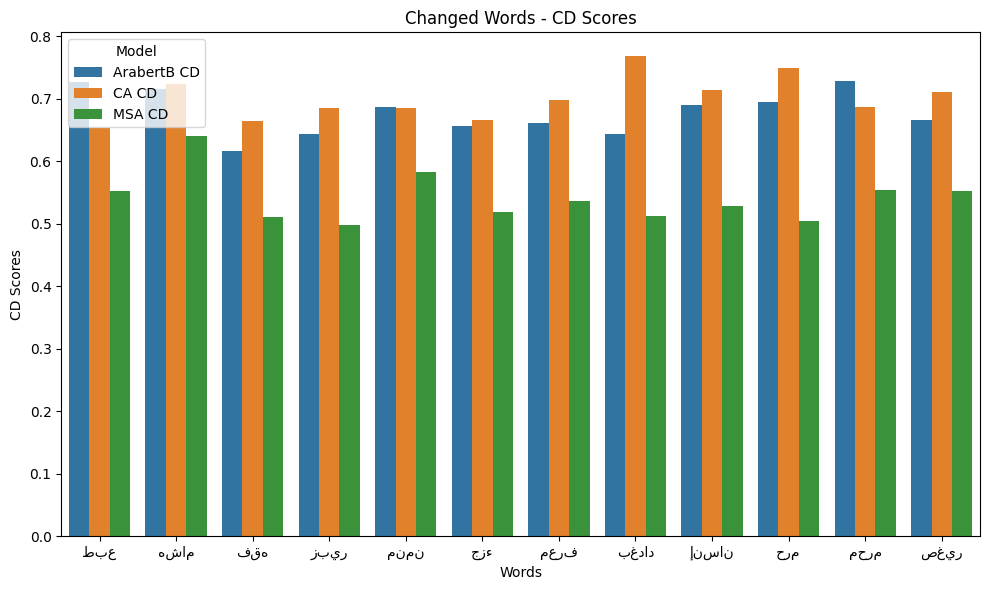

In [19]:
# plotting changed_df
plt.figure(figsize=(10, 6))

# for easier plotting
melted_df = pd.melt(changed_df, id_vars=['Words'], value_vars=['ArabertB CD', 'CA CD', 'MSA CD'], var_name='Model', value_name='CD Score')

# creating the bar plot
sns.barplot(x='Words', y='CD Score', hue='Model', data=melted_df)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('CD Scores')
plt.title('Changed Words - CD Scores')
plt.tight_layout()
plt.show()

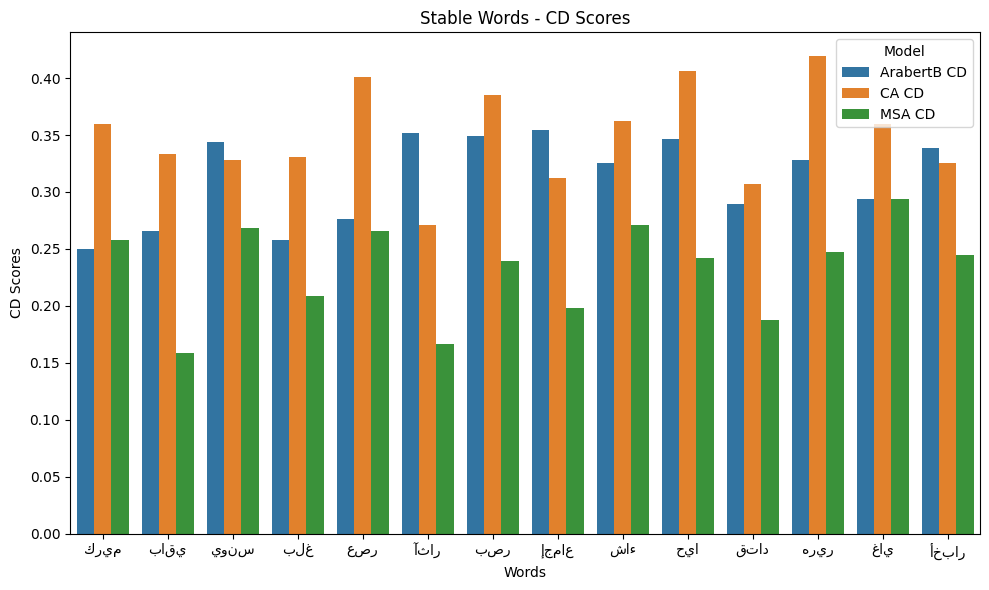

In [20]:
# plotting stable_df
plt.figure(figsize=(10, 6))

# for easier plotting
melted_df = pd.melt(stable_df, id_vars=['Words'], value_vars=['ArabertB CD', 'CA CD', 'MSA CD'], var_name='Model', value_name='CD Score')

# creating the bar plot
sns.barplot(x='Words', y='CD Score', hue='Model', data=melted_df)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('CD Scores')
plt.title('Stable Words - CD Scores')
plt.tight_layout()
plt.show()